In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

In [45]:
import warnings
warnings.filterwarnings('ignore')

In [46]:
# 1. load data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [47]:
# 2. explore data
print("train data:", train_data.shape)
print("train data info:\n", train_data.info())
print("train data describe:\n", train_data.describe())
print("train data isnull:\n", train_data.isnull().sum())
print("test data isnull:\n", test_data.isnull().sum())
print("train data rainfall value_counts:\n", train_data['rainfall'].value_counts())
print(f"train data rainfall value_counts(normalize):\n{train_data['rainfall'].value_counts(normalize=True)}")

train data: (2190, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.6 KB
train data info:
 None
train data describe:
                 id          day     pressure      maxtemp  temparature  \
count  2190.000000  2190.000000  2190.

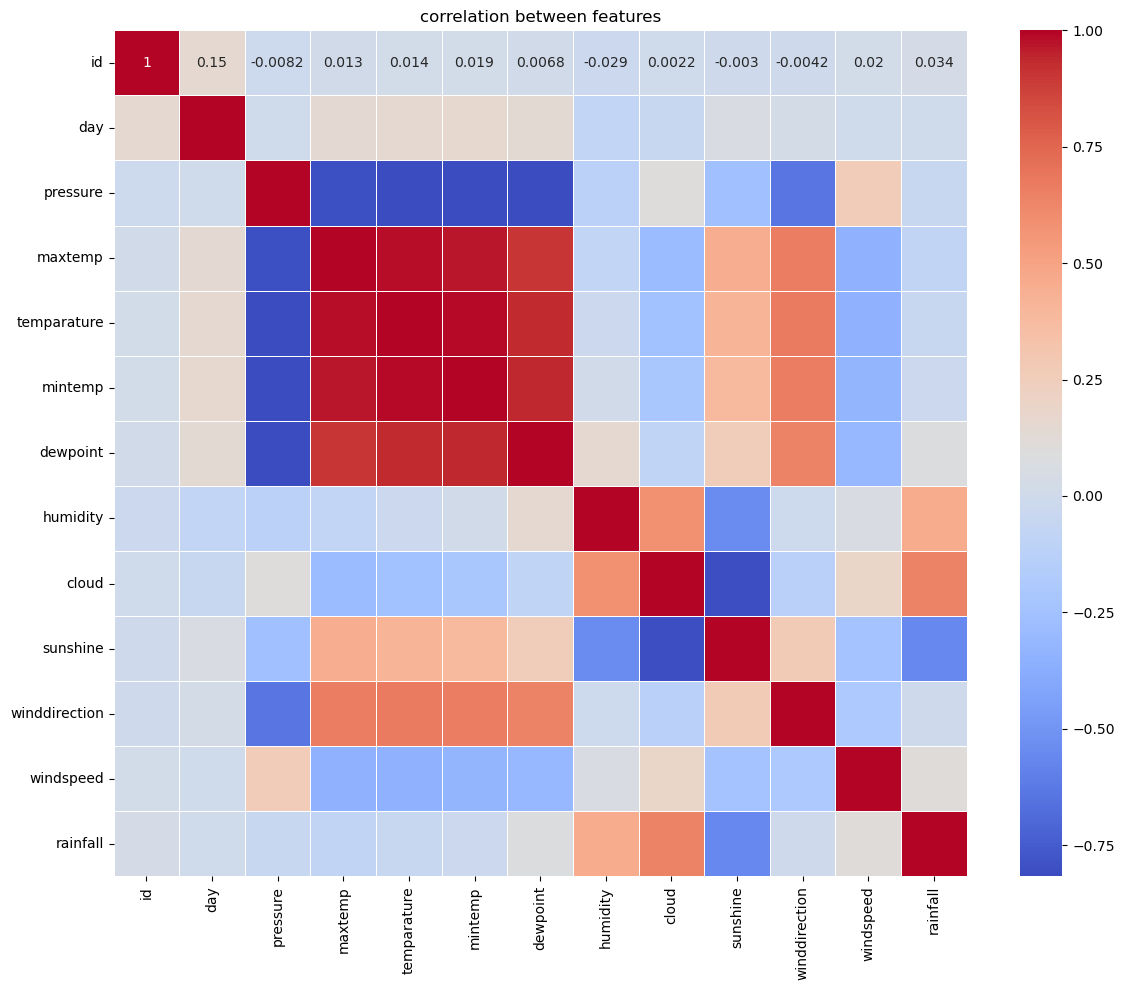

In [48]:
# 3. correlation analysis
correlation = train_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('correlation between features')
plt.tight_layout()
plt.show()
plt.close()

In [49]:
# 3.5 correlation between rainfall and other features
rainfall_corr = correlation['rainfall'].sort_values(ascending=False)
print("correlation between rainfall and each features:")
print(rainfall_corr)

correlation between rainfall and each features:
rainfall         1.000000
cloud            0.641191
humidity         0.454213
windspeed        0.111625
dewpoint         0.081965
id               0.033674
day             -0.000462
winddirection   -0.006939
mintemp         -0.026841
temparature     -0.049660
pressure        -0.049886
maxtemp         -0.079304
sunshine        -0.555287
Name: rainfall, dtype: float64


In [50]:
# 4. feature engineering
# 4-1. add temparature difference feature
train_data['temp_diff'] = train_data['maxtemp'] - train_data['mintemp']
test_data['temp_diff'] = test_data['maxtemp'] - test_data['mintemp']

In [51]:
# 4-2. add temp_dewpoint_diff feature
train_data['temp_dewpoint_diff'] = train_data['temparature'] - train_data['dewpoint']
test_data['temp_dewpoint_diff'] = test_data['temparature'] - test_data['dewpoint']

In [52]:
# 4-3. cyclical feature encoding
train_data['day_sin'] = np.sin(2 * np.pi * train_data['day'] / 365.25)
train_data['day_cos'] = np.cos(2 * np.pi * train_data['day'] / 365.25)
test_data['day_sin'] = np.sin(2 * np.pi * test_data['day'] / 365.25)
test_data['day_cos'] = np.cos(2 * np.pi * test_data['day'] / 365.25)

In [53]:
# 4-4. disclude 'id' and 'day' columns
train_features = train_data.drop(['id', 'day', 'rainfall'], axis=1)
test_features = test_data.drop(['id', 'day'], axis=1)

In [54]:
# 5. model training
train_target = train_data['rainfall']

# train/val split
X_train, X_val, y_train, y_val = train_test_split(train_features, train_target, test_size=0.2, random_state=42, stratify=train_target)

In [55]:
# feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
test_scaled = scaler.transform(test_features)

print("train data shape:", X_train.shape)
print("validation data shape:", X_val.shape)
print("test data shape:", test_features.shape)

train data shape: (1752, 14)
validation data shape: (438, 14)
test data shape: (730, 14)



# model training and evaluation

Logistic Regression model performance:
Accuracy: 0.8653
AUC: 0.8799

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.62      0.69       108
           1       0.88      0.95      0.91       330

    accuracy                           0.87       438
   macro avg       0.84      0.78      0.80       438
weighted avg       0.86      0.87      0.86       438



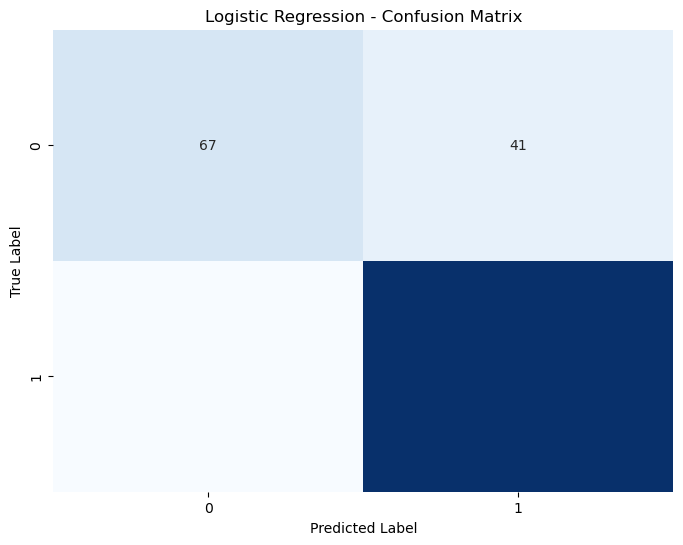


Random Forest model performance:
Accuracy: 0.8676
AUC: 0.8667

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.63      0.70       108
           1       0.89      0.95      0.91       330

    accuracy                           0.87       438
   macro avg       0.84      0.79      0.81       438
weighted avg       0.86      0.87      0.86       438



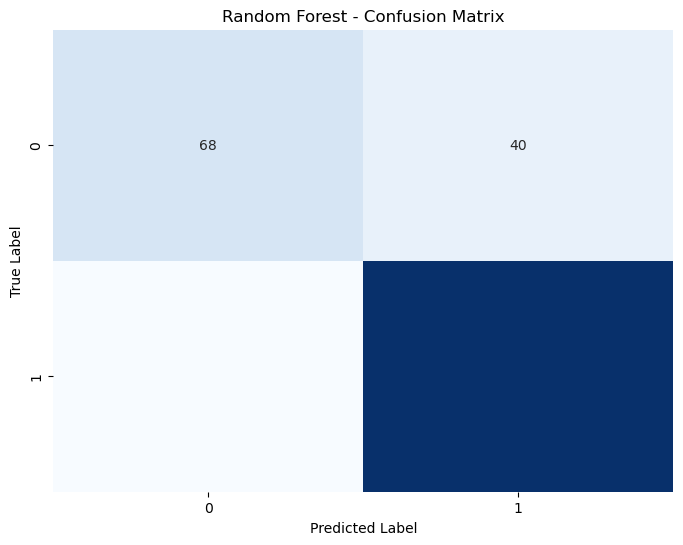


Gradient Boosting model performance:
Accuracy: 0.8584
AUC: 0.8589

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.61      0.68       108
           1       0.88      0.94      0.91       330

    accuracy                           0.86       438
   macro avg       0.82      0.78      0.79       438
weighted avg       0.85      0.86      0.85       438



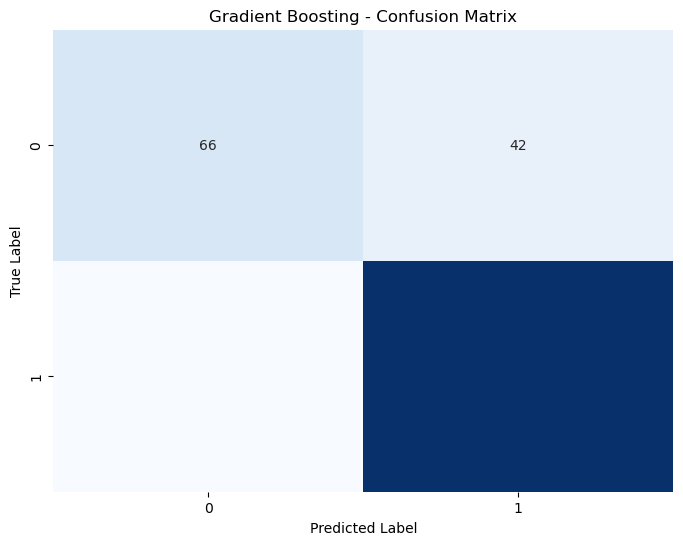


XGBoost model performance:
Accuracy: 0.8425
AUC: 0.8420

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.60      0.65       108
           1       0.88      0.92      0.90       330

    accuracy                           0.84       438
   macro avg       0.80      0.76      0.78       438
weighted avg       0.84      0.84      0.84       438



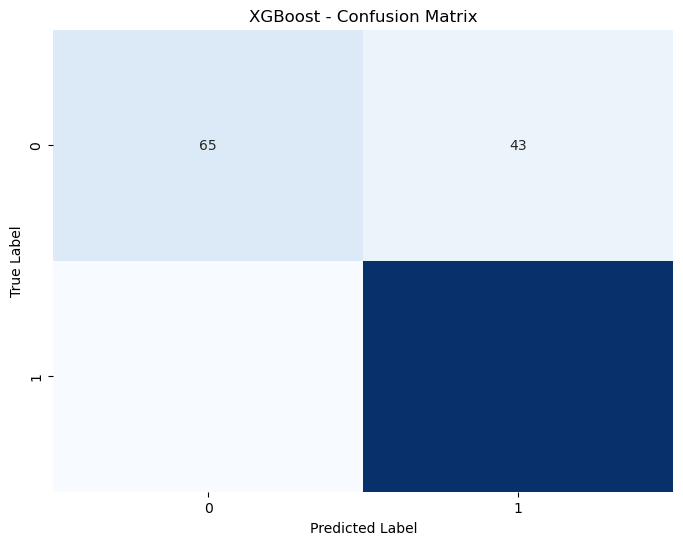

In [56]:
# training and comparing models
print("\n# model training and evaluation")
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBClassifier(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    # train model
    model.fit(X_train_scaled, y_train)

    # validation prediction
    val_pred = model.predict(X_val_scaled)
    val_prob = model.predict_proba(X_val_scaled)[:, 1] if hasattr(model, 'predict_proba') else None

    # accuracy
    accuracy = accuracy_score(y_val, val_pred)
    report = classification_report(y_val, val_pred)
    cm = confusion_matrix(y_val, val_pred)
    auc = roc_auc_score(y_val, val_prob) if val_prob is not None else None

    # store results
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'auc': auc,
        'report': report,
        'confusion_matrix': cm
    }

    # print result
    print(f"\n{name} model performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC: {auc:.4f}" if auc is not None else "AUC: None")
    print("\nClassification Report:")
    print(report)

    # confusion matrix visualization
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{name} - Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    plt.close()

In [57]:
# select the best model
print("\n# select the best model")
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
best_model = results[best_model_name]['model']
print(f"best model: {best_model_name}")
print(f"accuracy: {results[best_model_name]['accuracy']:.4f}")
print(f"AUC: {results[best_model_name]['auc']:.4f}" if results[best_model_name]['auc'] is not None else "AUC: None")


# select the best model
best model: Random Forest
accuracy: 0.8676
AUC: 0.8667


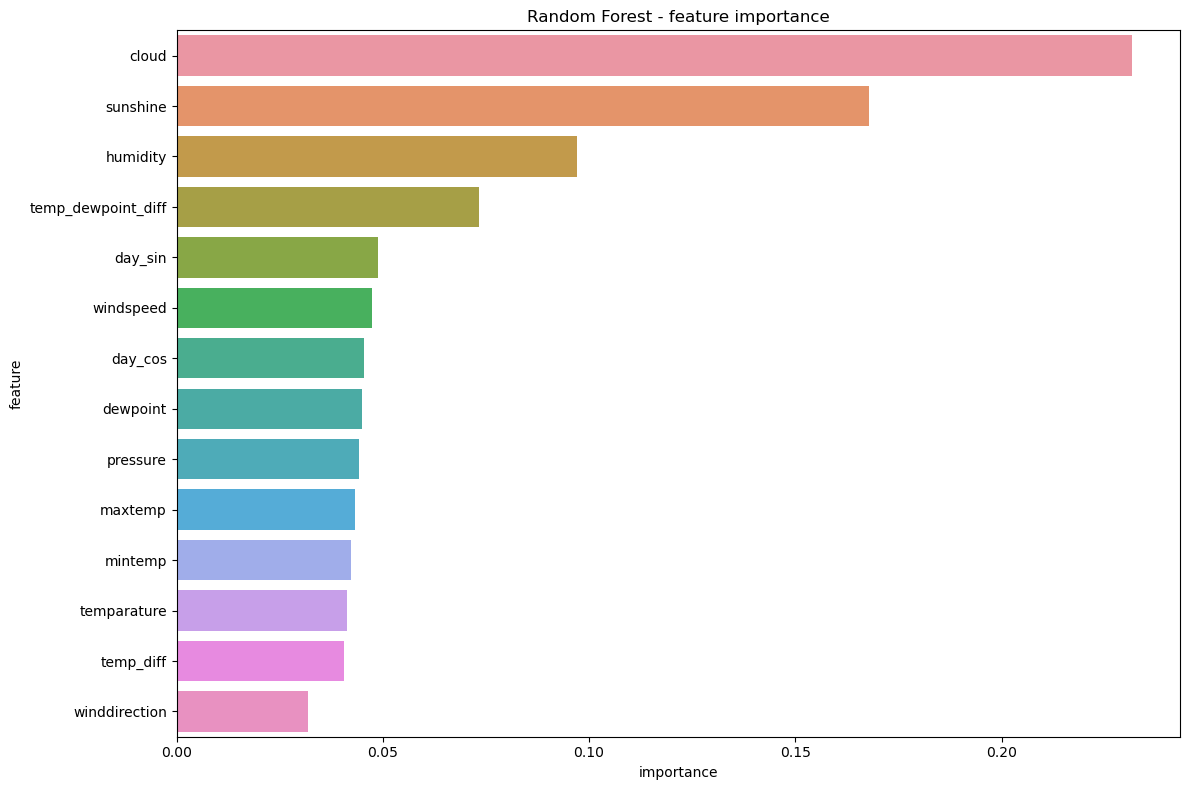


feature importance:
               feature  importance
6                cloud    0.231681
7             sunshine    0.167940
5             humidity    0.097117
11  temp_dewpoint_diff    0.073362
12             day_sin    0.048852
9            windspeed    0.047272
13             day_cos    0.045317
4             dewpoint    0.045002
0             pressure    0.044096
1              maxtemp    0.043320
3              mintemp    0.042182
2          temparature    0.041396
10           temp_diff    0.040597
8        winddirection    0.031867


In [58]:
# feature importance (tree)
if hasattr(best_model, 'feature_importances_'):
    feature_importances = pd.DataFrame({
        'feature': train_features.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='importance', y='feature', data=feature_importances)
    plt.title(f'{best_model_name} - feature importance')
    plt.tight_layout()
    plt.show()
    plt.close()
    print("\nfeature importance:")
    print(feature_importances)

In [59]:
# tuning hyperparameters
print("\n# tuning hyperparameters")
if best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
elif best_model_name == 'Gradient Boosting':
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
elif best_model_name == 'XGBoost':
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7],
        'subsample': [0.7, 0.8, 0.9],
        'colsample_bytree': [0.7, 0.8, 0.9]
    }
else:  # Logistic Regression
    param_grid = {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    }


# tuning hyperparameters


In [60]:
# grid search
grid_search = GridSearchCV(
    estimator=best_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

In [61]:
# run grid search
print("running grid search...")
grid_search.fit(X_train, y_train)

print(f"optimal hyperparameter: {grid_search.best_params_}")
print(f"optimal cross-validation score: {grid_search.best_score_:.4f}")

running grid search...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
optimal hyperparameter: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
optimal cross-validation score: 0.8653


In [62]:
# training with the best model
best_model = grid_search.best_estimator_
best_model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=200,
                       random_state=42)

In [63]:
# predict with validation data
y_pred = best_model.predict(X_val_scaled)
y_prob = best_model.predict_proba(X_val_scaled)[:, 1] if hasattr(best_model, 'predict_proba') else None

print(f"\nbest model performance (validation data):")
print(f"Accuracy: {accuracy_score(y_val, y_pred):.4f}")
print(f"AUC: {roc_auc_score(y_val, y_prob):.4f}" if y_prob is not None else "AUC: None")
print("\nClassification Report:")
print(classification_report(y_val, y_pred))


best model performance (validation data):
Accuracy: 0.8653
AUC: 0.8715

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.62      0.69       108
           1       0.88      0.95      0.91       330

    accuracy                           0.87       438
   macro avg       0.84      0.78      0.80       438
weighted avg       0.86      0.87      0.86       438



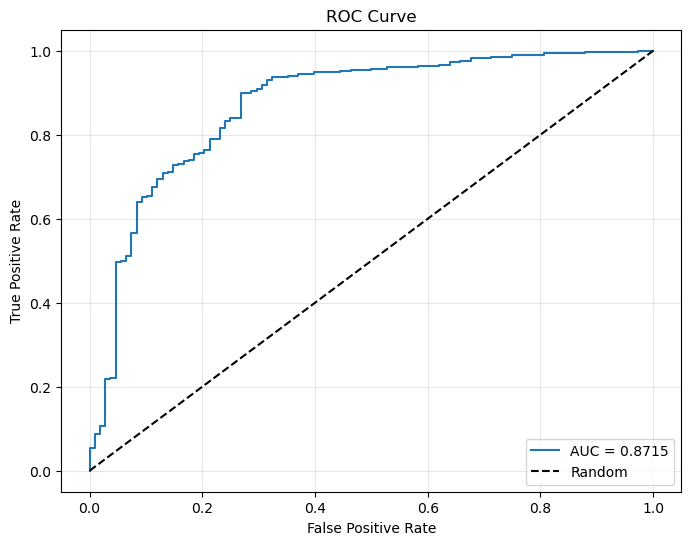

In [64]:
# ROC curve visualization
if y_prob is not None:
    fpr, tpr, _ = roc_curve(y_val, y_prob)
    auc = roc_auc_score(y_val, y_prob)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.grid(alpha=0.3)
    plt.show()
    plt.close()

In [65]:
# predict with test data
print("\n# predict with test data")
test_pred = best_model.predict(test_scaled)
test_prob = best_model.predict_proba(test_scaled)[:, 1] if hasattr(best_model, 'predict_proba') else None

# submission file
submission = pd.DataFrame({
    'id': test_data['id'],
    'rainfall': test_pred
})

# result
print("predict result distribution:")
print(submission['rainfall'].value_counts())

# save submsission file
submission.to_csv('submission.csv', index=False)
print("submission file created: 'submission.csv'")


# predict with test data
predict result distribution:
rainfall
1    580
0    150
Name: count, dtype: int64
submission file created: 'submission.csv'
